# Implementing a Perceptron

## 1) Installing Libraries

In [8]:
!pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 KB 7.3 MB/s eta 0:00:0000:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.0 MB/s eta 0:00:0000:0100:01


In [9]:
!conda install watermark

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - watermark

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

ModuleNotFoundError: No module named 'watermark'

## 2) Loading the Dataset

In [11]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [12]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [13]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [14]:
X_train.shape

(20, 2)

In [15]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y_train.shape

(20,)

In [17]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

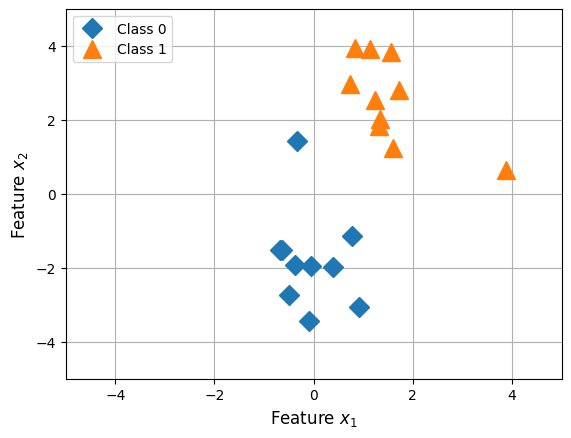

In [19]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

![](images/perceptron-sketch.png)

In [20]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

In [21]:
ppn = Perceptron(num_features=2)

In [22]:
ppn.weights

[0.0, 0.0]

In [23]:
ppn.bias

0.0

![](images/computing-z.png)

In [24]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [25]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.forward(x)

0

In [42]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    
    def plot_boundary(self):
        w1, w2 = self.weights[0], self.weights[1]
        b = self.bias
        x1_min = -20
        x1_max = 20
        if w2==0:
            x2_min=0
            x2_max=0
        else:
            x2_min = (-(w1 * x1_min) - b) / w2
            x2_max = (-(w1 * x1_max) - b) / w2

        return x1_min, x1_max, x2_min, x2_max

    def show_plot_boundaries(self):
        x1_min, x1_max, x2_min, x2_max = self.plot_boundary()


        plt.plot(
            X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker="D",
            markersize=10,
            linestyle="",
            label="Class 0",
        )

        plt.plot(
            X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker="^",
            markersize=13,
            linestyle="",
            label="Class 1",
        )

        plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

        plt.legend(loc=2)

        plt.xlim([-5, 5])
        plt.ylim([-5, 5])

        plt.xlabel("Feature $x_1$", fontsize=12)
        plt.ylabel("Feature $x_2$", fontsize=12)

        plt.grid()
        plt.show()

    def update(self, x, true_y,flag):
        prediction = self.forward(x)
        error = true_y - prediction
        if flag:
            self.show_plot_boundaries()
        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [45]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x, true_y=1,flag=0)

1

In [46]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: [1.1, 2.1]
  Bias: 1.0


In [49]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for idx,(x, y) in enumerate(zip(all_x, all_y)):
            if idx==0:
                flag=1
            else: 
                flag=0
            error = model.update(x, y, flag)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

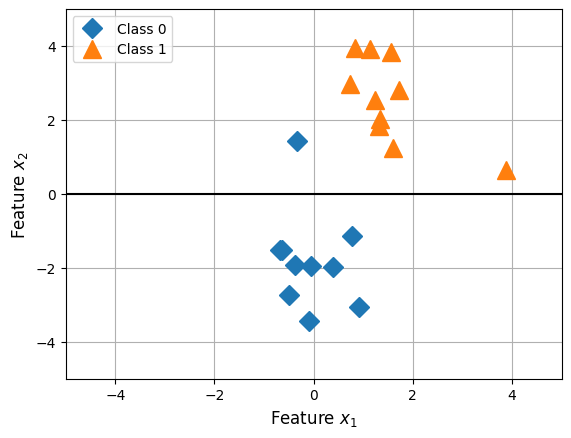

Epoch 1 errors 1


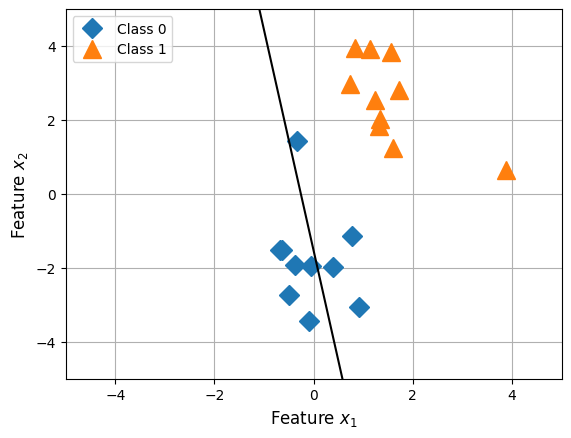

Epoch 2 errors 3


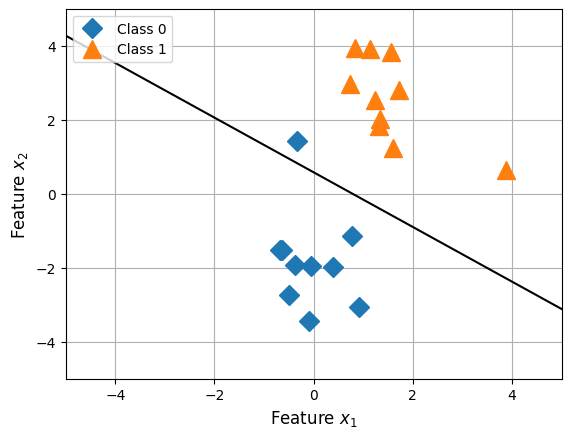

Epoch 3 errors 1


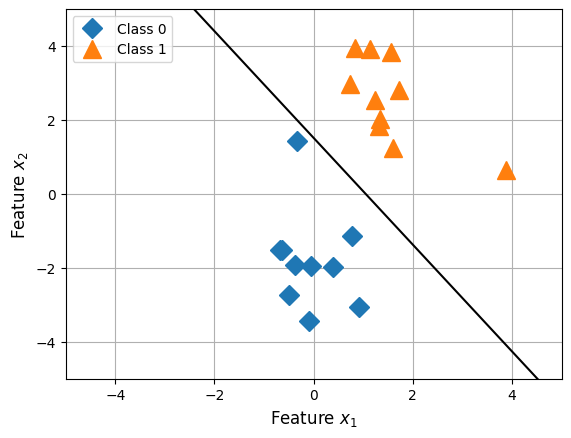

Epoch 4 errors 0


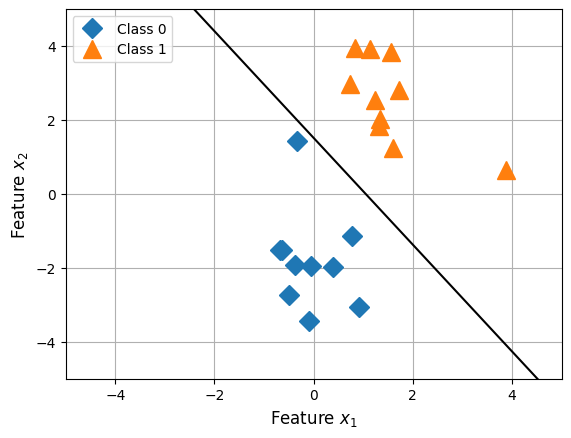

Epoch 5 errors 0


In [50]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

## 5) Evaluating the results

In [24]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [25]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [26]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%
